In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import streamlit as st

from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle
from matplotlib import pyplot

# from statsmodels.graphics.tsaplots import plot_acf, plot_pac
# import seaborn as sns

In [2]:
daily_load_shedding_df = pd.read_csv('../../data/cleaned data/dayly_load_shedding_schedule_chennai_2014_2022.csv')
daily_load_shedding_df.shape

(479, 9)

In [3]:
demand_supply_monthly_df = pd.read_csv('../../data/cleaned data/demand_supply_monthly.csv')
demand_supply_monthly_df.shape

(122, 17)

In [4]:
demand_supply_yearly_df= pd.read_csv('../../data/cleaned data/demand_supply_yearly.csv')
demand_supply_yearly_df.shape

(11, 12)

In [5]:
electricity_consumption_df = pd.read_csv('../../data/cleaned data/electricity_consumption_consolidated.csv')
electricity_consumption_df.shape

(64, 5)

In [6]:
electricity_generation_df = pd.read_csv('../../data/cleaned data/electricity_generation_consolidated_supply_only.csv')
electricity_generation_df.shape

(507, 4)

## daily_load_shedding_df

In [7]:
daily_load_shedding_df.columns

Index(['PO_day', 'PO_date', 'PO_start_time', 'PO_end_time', 'PO_posting_date',
       'PO_posting_time', 'PO_duration(Hrs)', 'PO_start_time_short',
       'PO_end_time_short'],
      dtype='object')

In [8]:
daily_load_shedding_df.tail()

,PO_day,PO_date,PO_start_time,PO_end_time,PO_posting_date,PO_posting_time,PO_duration(Hrs),PO_start_time_short,PO_end_time_short
474,Saturday,2014-05-17 00:00:00,1900-01-01 09:00:00,1900-01-01 17:00:00,2014-05-16 00:00:00,2:43:16 PM,8.0,09:00:00,17:00:00
475,Sunday,2014-10-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-09 00:00:00,4:13:21 PM,5.0,09:00:00,14:00:00
476,Friday,2014-09-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-08 00:00:00,3:25:55 PM,5.0,09:00:00,14:00:00
477,Tuesday,2014-08-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-07 00:00:00,12:09:01 PM,5.0,09:00:00,14:00:00
478,Saturday,2014-07-05 00:00:00,1900-01-01 09:00:00,1900-01-01 14:00:00,2014-05-06 00:00:00,11:18:47 AM,5.0,09:00:00,14:00:00


In [9]:
demand_supply_monthly_df.head()

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
0,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022,4,2022-05-23,5,2022
1,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022,5,2022-06-23,6,2022
2,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022,3,2022-04-25,4,2022
3,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022,1,2022-02-23,2,2022
4,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021,11,2021-12-23,12,2021


In [10]:
electricity_consumption_df[electricity_consumption_df.Category=='Domestic']

,Category Id,Category,Consumption (M.U),Year,Consumers
2,3,Domestic,13709,2010,15565047
9,3,Domestic,16312,2011,16318288
16,3,Domestic,16249,2012,16897339
23,3,Domestic,"18,231",2013,17697908
30,3,Domestic,20201,2014,18402768
36,3,Domestic,21990,2015,19988000
42,3,Domestic,23489,2016,20131000
48,3,Domestic,24530,2017,20696000
53,3,Domestic,25815,2018,21303347
59,3,Domestic,26996,2019,21875000


In [11]:
electricity_consumption_df.Category.unique()

array(['Industries (including Traction)', 'Agriculture', 'Domestic',
       'Commercial', 'Public Lighting and Water works',
       'Sales of Licensees,Sales to other States', 'Miscellaneous',
       'Miscellaneous ', 'Public Lighting and Water Works'], dtype=object)

In [12]:
electricity_generation_df.head()

,Type,Name,Net Generation(M.U),Year
0,Gas,Basin Bridge,79.16,2010
1,Gas,Kovil Kalappal,487.20,2010
2,Gas,Vazhuthur I & II,1008.89,2010
3,Gas,Kutralam,602.78,2010
4,Gas,Wind Mill,11.09,2010


In [13]:
demand_supply_yearly_df.shape

(11, 12)

In [14]:
demand_supply_monthly_df

,Requirement(MU/DAY),Energy_met(MU/DAY),Surplus(+)/Deficit(-)(MU/DAY),Requirement(MU),Energy_met(MU),Surplus(+)/Deficit(-)(MU),%Shortage(MU),Requirement(MW),Peak_Demand_Met5(MW),Surplus(+)/Deficit(-)(MW),%Shortage(MW),name_report,year,month,date_published,month_published,year_published
0,354.0,354.0,-0.9,10632.0,10605.0,-26.0,-0.2,17646.0,17563.0,-83.0,-0.5,Monthly_Report_Apr_2022,2022,4,2022-05-23,5,2022
1,337.0,337.0,0.0,10459.0,10458.0,-1.0,0.0,16906.0,16906.0,0.0,0.0,Monthly_Report_May_2022,2022,5,2022-06-23,6,2022
2,344.0,343.0,-0.3,10657.0,10648.0,-9.0,-0.1,17196.0,17196.0,0.0,0.0,Monthly_Report_Mar_2022,2022,3,2022-04-25,4,2022
3,286.0,286.0,0.0,8873.0,8873.0,1.0,0.0,15290.0,15290.0,0.0,0.0,Monthly_Report_Jan_2022,2022,1,2022-02-23,2,2022
4,245.0,245.0,0.0,7362.0,7360.0,-1.0,0.0,13501.0,13480.0,-21.0,-0.2,Monthly_Report_Nov_2021,2021,11,2021-12-23,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,284.0,284.0,-0.1,8807.0,8803.0,-4.0,0.0,14971.0,14946.0,-25.0,-0.2,Monthly Report December 2018,2018,12,2019-01-23,1,2019
118,285.0,284.8,-0.3,8835.9,8828.0,-7.9,-0.1,14971.0,14946.0,-25.0,-0.2,Monthly Report October 2018,2018,10,2018-11-22,11,2018
119,300.9,300.7,-0.2,9326.8,9320.9,-5.8,-0.1,15025.0,14984.0,-41.0,-0.3,Monthly Report August 2018,2018,8,2018-09-23,9,2018
120,315.7,315.5,-0.2,9471.3,9464.3,-7.0,-0.1,15191.0,15183.0,-8.0,-0.1,Monthly Report June 2018,2018,6,2018-07-23,7,2018


In [15]:
demand_supply_monthly_df.columns

Index(['Requirement(MU/DAY)', 'Energy_met(MU/DAY)',
       'Surplus(+)/Deficit(-)(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)',
       'Surplus(+)/Deficit(-)(MU)', '%Shortage(MU)', 'Requirement(MW)',
       'Peak_Demand_Met5(MW)', 'Surplus(+)/Deficit(-)(MW)', '%Shortage(MW)',
       'name_report', 'year', 'month', 'date_published', 'month_published',
       'year_published'],
      dtype='object')

In [16]:
demand_supply_monthly_df[['month','year']].groupby(['year']).count()

,month
year,
2012,9
2013,12
2014,12
2015,12
2016,12
2017,12
2018,12
2019,12
2020,12


# Questions to be addressed
### Build a model to predict the following based on the month-wise energy consumption pattern in Tamil Nadu, India data collected  
#### 1) Predict the Requirements (MU/Day)
#### 2) Requirement(MU)
#### 3) Requirement(MW)
#### 4) Predict the Peak_Demand_Met5(MW) for future months


MU means Million units of electricity. One unit of electricity is one Kilowatt per hour. One Kilowatt are a thousand Watts. 

MW - Megawatts are basic to understanding electricity planning concepts. 
Watts (W) are the yardstick for measuring power. A one hundred watt light bulb, for example, is rated to consume one hundred watts of power when turned on. If such a light bulb were on for four hours it would consume a total of 400 watt-hours (Wh) of energy. Watts, therefore, measure instantaneous power while watt hours measure the total amount of energy consumed over a period of time.

A megawatt (MW) is one million watts and a kilowatt (kW) is one thousand watts. Both terms are commonly used in the power business when describing generation or load consumption. For instance, a 100 MW rated wind farm is capable of producing 100 MW during peak winds, but will produce much less than its rated amount when winds are light. 

The ratio of a power plant’s average production to its rated capability is known as capacity factor. Load factor generally, on the other hand, is calculated by dividing the average load by the peak load over a certain period of time. If the residential load at a utility averaged 5,000 MW over the course of a year and the peak load was 10,000 MW, then the residential customers would be said to have a load factor of 50
percent (5,000 MW average divided by 10,000 MW peak).

In [17]:
df_temp = demand_supply_monthly_df[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 
                                    'Energy_met(MU)','Requirement(MW)', 'Peak_Demand_Met5(MW)','year', 'month']]

df_temp.shape

(122, 8)

In [18]:
df_temp.head()

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW),year,month
0,354.0,354.0,10632.0,10605.0,17646.0,17563.0,2022,4
1,337.0,337.0,10459.0,10458.0,16906.0,16906.0,2022,5
2,344.0,343.0,10657.0,10648.0,17196.0,17196.0,2022,3
3,286.0,286.0,8873.0,8873.0,15290.0,15290.0,2022,1
4,245.0,245.0,7362.0,7360.0,13501.0,13480.0,2021,11


In [19]:
#demand_supply_monthly_df = pd.read_csv('../../data/cleaned data/demand_supply_monthly.csv')
#demand_supply_monthly_df.shape
df_temp['date'] = pd.to_datetime(df_temp['year'].apply(str)+'-'+df_temp['month'].apply(str)+'-'+str(1), format='%Y-%m-%d')

/tmp/ipykernel_32274/70565087.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['date'] = pd.to_datetime(df_temp['year'].apply(str)+'-'+df_temp['month'].apply(str)+'-'+str(1), format='%Y-%m-%d')


In [20]:
df_temp.sort_values('date', inplace=True)


/tmp/ipykernel_32274/4199139029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values('date', inplace=True)


In [21]:
df_temp.tail()

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW),year,month,date
3,286.0,286.0,8873.0,8873.0,15290.0,15290.0,2022,1,2022-01-01
8,322.0,322.0,9028.0,9028.0,16262.0,16262.0,2022,2,2022-02-01
2,344.0,343.0,10657.0,10648.0,17196.0,17196.0,2022,3,2022-03-01
0,354.0,354.0,10632.0,10605.0,17646.0,17563.0,2022,4,2022-04-01
1,337.0,337.0,10459.0,10458.0,16906.0,16906.0,2022,5,2022-05-01


In [22]:
# To find the correlation among
# the columns using pearson method
df_temp[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)','Requirement(MW)', 
         'Peak_Demand_Met5(MW)']].corr(method ='pearson')

,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW)
Requirement(MU/DAY),1.000000,0.936236,0.962122,0.910293,0.826244,0.800857
Energy_met(MU/DAY),0.936236,1.000000,0.906506,0.978842,0.877694,0.917977
Requirement(MU),0.962122,0.906506,1.000000,0.937061,0.818923,0.786638
Energy_met(MU),0.910293,0.978842,0.937061,1.000000,0.872410,0.907465
Requirement(MW),0.826244,0.877694,0.818923,0.872410,1.000000,0.951951
Peak_Demand_Met5(MW),0.800857,0.917977,0.786638,0.907465,0.951951,1.000000


In [23]:



corr = df_temp[['Requirement(MU/DAY)', 'Energy_met(MU/DAY)', 'Requirement(MU)', 'Energy_met(MU)',
                     'Requirement(MW)','Peak_Demand_Met5(MW)']].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# plt.matshow(corr)
# plt.show()

/tmp/ipykernel_32274/3671122157.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Requirement(MU/DAY),Energy_met(MU/DAY),Requirement(MU),Energy_met(MU),Requirement(MW),Peak_Demand_Met5(MW)
Requirement(MU/DAY),1.00,0.94,0.96,0.91,0.83,0.80
Energy_met(MU/DAY),0.94,1.00,0.91,0.98,0.88,0.92
Requirement(MU),0.96,0.91,1.00,0.94,0.82,0.79
Energy_met(MU),0.91,0.98,0.94,1.00,0.87,0.91
Requirement(MW),0.83,0.88,0.82,0.87,1.00,0.95
Peak_Demand_Met5(MW),0.80,0.92,0.79,0.91,0.95,1.00


In [24]:
df_temp1 = df_temp[['date','Peak_Demand_Met5(MW)']]

df_temp1.set_index('date', inplace=True)

df_temp1.head()

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0


In [25]:
df_temp1.sort_index()

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0
...,...
2022-01-01,15290.0
2022-02-01,16262.0
2022-03-01,17196.0


In [26]:
df = df_temp1
#df_ts['t'] = [x for x in range(10)]
df

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0
...,...
2022-01-01,15290.0
2022-02-01,16262.0
2022-03-01,17196.0


### Plot Peak_Demand_Met5


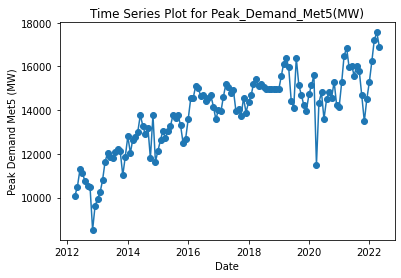

In [27]:

plt.plot(df["Peak_Demand_Met5(MW)"], marker='o')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Peak Demand Met5 (MW)")
plt.title("Time Series Plot for Peak_Demand_Met5(MW)")

# Display

plt.show()

The graph shows that the demand has not been stationary. Inorder to model this data, we will have to first make this series as a stationary series. Then only, we would be in a postion to forecast next month's/future demand.

Different types of Stationary Time Series

a) Stationary Process: A process that generates a stationary series of observations.


b) Stationary Model: A model that describes a stationary series of observations.


c) Trend Stationary: A time series that does not exhibit a trend.


d) Seasonal Stationary: A time series that does not exhibit seasonality.


e) Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint f) distribution of observations is invariant to time shift.

In [28]:
# First-order difference
df['Peak_Demand_Met5_MW_diff1'] = df['Peak_Demand_Met5(MW)'].diff(periods=1)
df = df.dropna()

/tmp/ipykernel_32274/51868633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Peak_Demand_Met5_MW_diff1'] = df['Peak_Demand_Met5(MW)'].diff(periods=1)


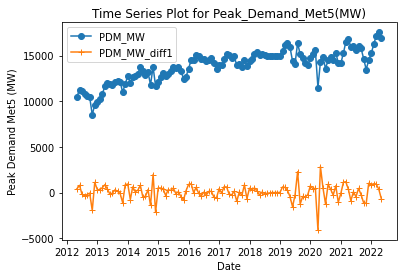

In [29]:

plt.plot(df["Peak_Demand_Met5(MW)"], marker='o',  label='PDM_MW')
plt.plot(df["Peak_Demand_Met5_MW_diff1"], marker='+', label='PDM_MW_diff1')

# Labelling 

plt.xlabel("Date")
plt.ylabel("Peak Demand Met5 (MW)")
plt.title("Time Series Plot for Peak_Demand_Met5(MW)")
plt.legend();

# Display

plt.show()

In [30]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
df_stationarityTest = adfuller(df['Peak_Demand_Met5(MW)'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
# from statsmodels.graphics.tsaplots import plot_pacf
# pacf = plot_pacf(df['Consumption'], lags=25)


P-value:  0.16621387265879567


In [31]:

# Calculate autocorrelation
acf_values = acf(df['Peak_Demand_Met5_MW_diff1'])
print(np.round(acf_values,2))

pacf_values = pacf(df['Peak_Demand_Met5_MW_diff1'])
print(np.round(pacf_values,2))


[ 1.   -0.26 -0.1  -0.   -0.08 -0.01  0.04 -0.1  -0.12  0.05  0.17 -0.07
 -0.    0.14 -0.08  0.09 -0.13 -0.09  0.04  0.1  -0.09]
[ 1.   -0.26 -0.18 -0.09 -0.14 -0.1  -0.03 -0.15 -0.27 -0.17  0.06 -0.08
 -0.09  0.13  0.02  0.11 -0.13 -0.12 -0.02  0.09 -0.09]


In [32]:
type(pd.Series(pacf_values))

pandas.core.series.Series

<AxesSubplot:>

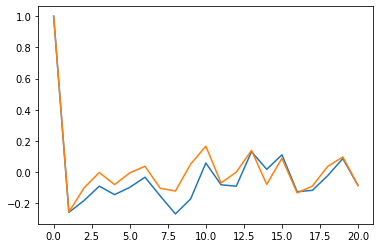

In [33]:
pd.Series(pacf_values).plot()
pd.Series(acf_values).plot()


Ref:  https://towardsdatascience.com/time-series-from-scratch-autocorrelation-and-partial-autocorrelation-explained-1dd641e3076f
        
        
        
How to interpret ACF and PACF plots
Time series models you’ll soon learn about, such as Auto Regression (AR), Moving Averages (MA), or their combinations (ARMA), require you to specify one or more parameters. These can be obtained by looking at ACF and PACF plots.

In a nutshell:

If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.

If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.

If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).

If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

In [34]:
# Plot autocorrelation
# plot_acf(df['Peak_Demand_Met5_MW_diff1'], lags=30);

In [35]:
from statsmodels.tsa.ar_model import AutoReg


In [36]:
# find the index which allows us to split off 30% of the data
cutoff = round(df.shape[0]*0.7)
cutoff

85

## AR(1)

In [37]:
#
# Create training and test data
#
train_data = df['Peak_Demand_Met5(MW)'][:cutoff]
test_data = df['Peak_Demand_Met5(MW)'][cutoff:]
#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=1).fit()

df['Peak_Demand_Met5(MW)'].to_csv('train_data_peak_demand.csv')

#
# Print Summary
#
print(ar_model.summary())

import pickle

# save the model to disk
filename = 'auto_regressive_1_model.sav'
pickle.dump(ar_model, open(filename, 'wb'))


                             AutoReg Model Results                              
Dep. Variable:     Peak_Demand_Met5(MW)   No. Observations:                   85
Model:                       AutoReg(1)   Log Likelihood                -657.749
Method:                 Conditional MLE   S.D. of innovations            608.752
Date:                  Tue, 02 Aug 2022   AIC                           1321.499
Time:                          11:24:34   BIC                           1328.791
Sample:                      06-01-2012   HQIC                          1324.430
                           - 05-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1046.5419    539.009      1.942      0.052      -9.897    2102.981
Peak_Demand_Met5(MW).L1     0.9264      0.040     23.080      0.000       0.

/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

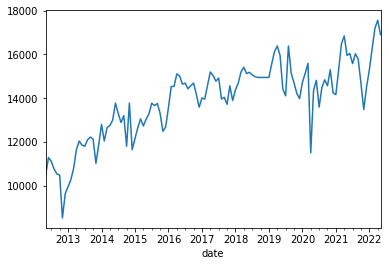

In [38]:
df['Peak_Demand_Met5(MW)'].plot()

/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


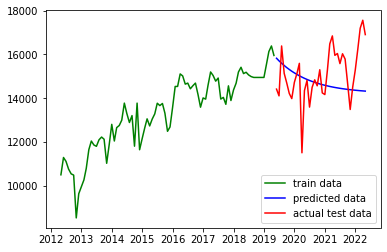

In [39]:
#
# Make the predictions
#
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)


# pred = ar_model.predict(10, 12, dynamic=False)

# print(pred)
#
# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(train_data, color='green')
pyplot.plot(pred, color='blue')
pyplot.plot(test_data, color='red')
plt.legend(["train data", "predicted data","actual test data"], loc ="lower right")


The more lags you use, the lower the correlation will be. The easiest way to make time series stationary is by calculating the first-order difference. 


In [40]:

scores=list()
mse = mean_squared_error(test_data, pred)
# calculate rmse
rmse = sqrt(mse)
# store
scores.append(rmse)
print(mse, rmse, scores)



2072491.5106165214 1439.6150564010231 [1439.6150564010231]


## AR(2)

                             AutoReg Model Results                              
Dep. Variable:     Peak_Demand_Met5(MW)   No. Observations:                   85
Model:                       AutoReg(2)   Log Likelihood                -646.683
Method:                 Conditional MLE   S.D. of innovations            585.473
Date:                  Tue, 02 Aug 2022   AIC                           1301.365
Time:                          11:24:35   BIC                           1311.041
Sample:                      07-01-2012   HQIC                          1305.252
                           - 05-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     689.8959    538.178      1.282      0.200    -364.913    1744.705
Peak_Demand_Met5(MW).L1     0.6754      0.105      6.428      0.000       0.

/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


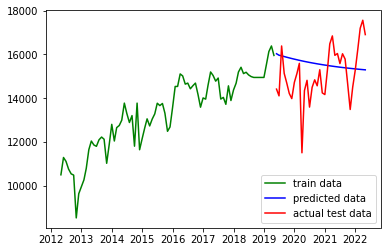

In [41]:
ar_model2 = AutoReg(train_data, lags=2).fit()

#
# Print Summary
#
print(ar_model2.summary())


# save the model to disk
filename = 'auto_regressive_2_model.sav'
pickle.dump(ar_model2, open(filename, 'wb'))

#
# Make the predictions
#
pred = ar_model2.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

pyplot.plot(train_data, color='green')
pyplot.plot(pred, color='blue')
pyplot.plot(test_data, color='red')
plt.legend(["train data", "predicted data","actual test data"], loc ="lower right")


scores=list()
mse = mean_squared_error(test_data, pred)
# calculate rmse
rmse = sqrt(mse)
# store
scores.append(rmse)
print("MSE: {}    RMSE: {}   SCORES: {} ".format(str(mse), str(rmse), str(scores)))



## AR(3)

In [42]:

# actual_data


/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/abhay.bhadani/Omdena/venvpy39/lib/python3.9/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency se

[205.20536628719867, 645.526822917287, 802.8309966785072, 928.1235469187044, 983.651027446919, 1036.7069592227683, 1061.6567100436027, 1039.3322512467323, 940.1882543441814, 899.984628755695, 958.0688135357506, 982.3469130688355]


,lag,ar_rmse_scores
lag,,
1,1,205.205366
2,2,645.526823
3,3,802.830997
4,4,928.123547
5,5,983.651027
6,6,1036.706959
7,7,1061.656710
8,8,1039.332251
9,9,940.188254


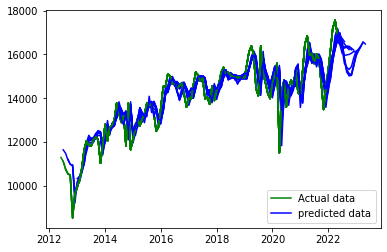

In [43]:
ar_rmse_scores=list()

for lags_value in range(1,13):
#     lags_value = 7


    # ar_model7 = AutoReg(train_data, lags=lags_value).fit()
    ar_model = AutoReg(df['Peak_Demand_Met5(MW)'][lags_value:], lags=lags_value).fit()

    #
    # Print Summary
    #
#     print(ar_model.summary())


    # save the model to disk
    filename = 'auto_regressive_'+str(lags_value)+'_model.sav'
    pickle.dump(ar_model, open(filename, 'wb'))

    #
    # Make the predictions
    #
    # pred = ar_model7.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
    # pred = ar_model7.predict(start=lags_value+1, end=len(df), dynamic=False)
    pred = ar_model.predict(start=lags_value, end=len(df)-1, dynamic=False)#[lags_value-1:-1]

    actual_data = df['Peak_Demand_Met5(MW)'][lags_value:]
#     print(len(actual_data))
#     print(len(pred))
    # temp_df = pd.DataFrame(zip(actual_data[7:],pred[6:-1]), columns=['actual_data','pred'])
    # print(temp_df.head())

    pyplot.plot(actual_data, color='green')
    pyplot.plot(pred, color='blue')
    # pyplot.plot(test_data, color='red')
    # plt.legend(["Actual data", "predicted data","actual test data"], loc ="lower right")
    plt.legend(["Actual data", "predicted data"], loc ="lower right")


    scores=list()
    # mse = mean_squared_error(test_data, pred)
    mse = mean_squared_error(actual_data, pred)
    # calculate rmse
    rmse = sqrt(mse)
    # store
    ar_rmse_scores.append(rmse)
#     print("MSE: {}    RMSE: {}   SCORES: {} ".format(str(mse), str(rmse), str(scores)))

#     print(len(actual_data) , len(pred))

print(ar_rmse_scores)
lag = [i for i in range(1,13)]
# AR_n_RMSE = [1439.62, 1370.098, 1359.12, 1350.44, 1331.96, 1324.12, 1287.82, 1312.48, 1323.06, 1305.37, 1295.28, 1333.13]
ar_performance_df = pd.DataFrame(list(zip(lag, ar_rmse_scores)),columns =['lag', 'ar_rmse_scores'])
ar_performance_df.set_index(ar_performance_df.lag, inplace=True)
ar_performance_df

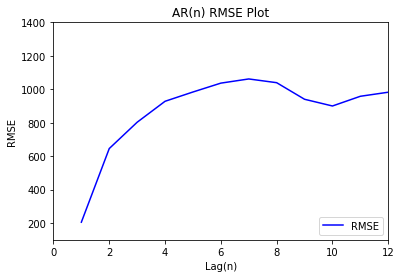

In [44]:
pyplot.axis([0, 12, 100, 1400])

pyplot.xlim(0, 12)

# Add title
# ar_performance_df.index+=1
pyplot.title("AR(n) RMSE Plot")
pyplot.plot(ar_performance_df.ar_rmse_scores, color='blue')
pyplot.legend(["RMSE"], loc ="lower right")

# Add labels

pyplot.xlabel("Lag(n)")
pyplot.ylabel("RMSE")

# Display

pyplot.show()

In [55]:
!ls

auto_regressive_10_model.sav  chennai_power_outage_modeling.ipynb
auto_regressive_11_model.sav  chennai_power_outage_modeling-xgboost.ipynb
auto_regressive_12_model.sav  finalized_ar1_model.sav
auto_regressive_1_model.sav   finalized_lstm_model.sav
auto_regressive_2_model.sav   LSTM Peak Demand prediction model.ipynb
auto_regressive_3_model.sav   lstm_streamlit_app.ipynb
auto_regressive_4_model.sav   lstm_streamlit_app.py
auto_regressive_5_model.sav   peak_demand_5features.csv
auto_regressive_6_model.sav   Readme.md
auto_regressive_7_model.sav   Time Series Analysis_Alice Agrawal-Copy1.ipynb
auto_regressive_8_model.sav   Time Series Analysis_Alice Agrawal.ipynb
auto_regressive_9_model.sav   train_data_peak_demand.csv


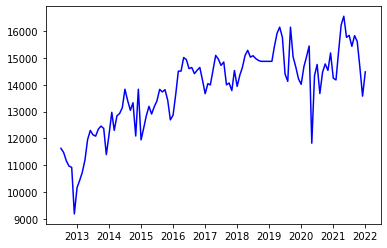

In [59]:
import pickle
filename = 'auto_regressive_1_model.sav'

# loaded_ar_model=pickle.load(open(filename, 'rb'))

# load
with open(filename, 'rb') as f:
    loaded_ar_model = pickle.load(f)



pred = loaded_ar_model.predict(1, 115)

from matplotlib import pyplot
# pyplot.plot(train_data, color='green')
pyplot.plot(pred, color='blue')
# pyplot.plot(test_data, color='red')
# plt.legend(["train data", "predicted data","actual test data"], loc ="lower right")


## LSTM Implementation 

In [47]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

import pickle
from matplotlib import pyplot


In [48]:
demand_supply_monthly_df = pd.read_csv('../../data/cleaned data/demand_supply_monthly.csv')
print(demand_supply_monthly_df.shape)
demand_supply_monthly_df['date'] = pd.to_datetime(demand_supply_monthly_df['year'].apply(str)+'-'+demand_supply_monthly_df['month'].apply(str)+'-'+str(1), format='%Y-%m-%d')
demand_supply_monthly_df.sort_values('date', inplace=True)
demand_supply_monthly_df.set_index('date', inplace=True)

(122, 17)


In [49]:
df = demand_supply_monthly_df[['Peak_Demand_Met5(MW)']]
df.head()

,Peak_Demand_Met5(MW)
date,
2012-04-01,10078.0
2012-05-01,10491.0
2012-06-01,11283.0
2012-07-01,11105.0
2012-08-01,10751.0


In [50]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

2022-08-02 11:25:21.364288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/mpi/lib:
2022-08-02 11:25:21.364317: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [62]:
lstm_rmse_scores= list()
no_of_lags=13
for val in range(1,no_of_lags):
    ### n_in : Number of Lag Observation
    ### n_out : Number of Observation as Output
    n_in=val
    n_out=1
    n_epochs = 100

    n_steps = n_in
    n_features= n_out

    dropnan=False
    n_vars = 1 if type(df) is list else df.shape[1]
    df = df[['Peak_Demand_Met5(MW)']]

    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('PD_Met5_MW_%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('PD_Met5_MW_%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('PD_Met5_MW_%d(t+%d)' % (j+1, i)) for j in range(n_vars)]



    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

#     print(agg.head(7))

    # agg.to_csv('peak_demand_5features.csv')
    



    print('n_steps: {}, n_features: {}'.format(str(n_steps), str(n_features)))
    # define model
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')


    sequence = agg[['PD_Met5_MW_1(t)']].to_numpy()
    # type(sequence), sequence.shape, sequence.shape[0], sequence.shape[1]

    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)

    X = array(X)
    y = array(y)
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    print(X.shape, y.shape)
    # fit model
    model.fit(X, y, epochs=n_epochs, verbose=0)

    train_data= agg['PD_Met5_MW_1(t)'].to_list()[0: len(agg['PD_Met5_MW_1(t)'])-n_steps]
    type(train_data), len(train_data)

    y_org = list()
    y_hat = list()
    datei = list()
    for i in range(0, len(agg['PD_Met5_MW_1(t)'])-n_steps):
        x_input=agg['PD_Met5_MW_1(t)'].to_numpy()[i:i+n_steps]
        # x_input = np.asarray([14501., 15290., 16262., 17196., 17563.])
        yorg = agg[['PD_Met5_MW_1(t)']].to_numpy()[i+n_steps]
        x_input = x_input.reshape(1, n_steps, n_features)
        yhat = model.predict(x_input, verbose=0)
        y_hat.append(yhat[0][0])
        y_org.append(yorg[0])
        datei.append(agg['PD_Met5_MW_1(t)'].index[i+n_steps])
        


    dff = pd.DataFrame(list(zip(datei, train_data, y_org, y_hat)),columns =['date','train_data', 'y_org','y_hat'])
    dff['error'] = dff['y_org'] - dff['y_hat']
    dff.set_index(dff.date, inplace=True)

    mse = mean_squared_error(dff.y_org, dff.y_hat)
    # calculate rmse
    rmse = sqrt(mse)
    print("MSE: {}    RMSE: {}    ".format(str(mse), str(rmse)))
    lstm_rmse_scores.append(rmse)


n_steps: 1, n_features: 1
(121, 1, 1) (121, 1)
MSE: 7400190.463706237    RMSE: 2720.329109447281    
n_steps: 2, n_features: 1
(120, 2, 1) (120, 1)
MSE: 753712.7513649396    RMSE: 868.1663154977505    
n_steps: 3, n_features: 1
(119, 3, 1) (119, 1)
MSE: 735762.7269464121    RMSE: 857.7661260194483    
n_steps: 4, n_features: 1
(118, 4, 1) (118, 1)
MSE: 920376.5384161753    RMSE: 959.362568800855    
n_steps: 5, n_features: 1
(117, 5, 1) (117, 1)
MSE: 843448.594316034    RMSE: 918.3945744156125    
n_steps: 6, n_features: 1
(116, 6, 1) (116, 1)
MSE: 923741.7472853229    RMSE: 961.1148460435531    
n_steps: 7, n_features: 1
(115, 7, 1) (115, 1)
MSE: 870993.033755153    RMSE: 933.2700754632353    
n_steps: 8, n_features: 1
(114, 8, 1) (114, 1)
MSE: 1003007.9204134201    RMSE: 1001.5028309562684    
n_steps: 9, n_features: 1
(113, 9, 1) (113, 1)
MSE: 826824.7885729052    RMSE: 909.2990644297976    
n_steps: 10, n_features: 1
(112, 10, 1) (112, 1)
MSE: 746699.3130879075    RMSE: 864.1176500

In [ ]:
dff.head()

In [ ]:
temp_df = pd.DataFrame(zip(lstm_rmse_scores, ar_rmse_scores), columns=['lstm','ar'])
temp_df.index += 1 
temp_df

In [ ]:
pyplot.axis([0, 13, 100, 1500])

pyplot.xlim(0, 12)

# Add title

pyplot.title("RMSE Comparision: LSTM vs AR")
pyplot.plot(temp_df.lstm, color='blue')
pyplot.plot(temp_df.ar, color='red')

pyplot.legend(["LSTM_RMSE", "AR_RMSE"], loc ="upper right")

# Add labels

pyplot.xlabel("No. of dependent features ")
pyplot.ylabel("RMSE")

# Display

pyplot.show()

In [ ]:
# len(train_data),len(y_org),len(y_hat)

In [ ]:


# dff.head(10)

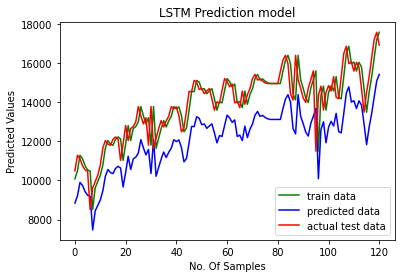

In [61]:

pyplot.plot(dff.train_data, color='green')
pyplot.plot(dff.y_hat, color='blue')
pyplot.plot(dff.y_org, color='red')
# pyplot.plot(ylim=dff.date)


# pyplot.plot()
pyplot.legend(["train data", "predicted data","actual test data"], loc ="lower right")
# Add labels
pyplot.title("LSTM Prediction model")

pyplot.xlabel("No. Of Samples")
pyplot.ylabel("Predicted Values")


pyplot.show()

In [ ]:
# import pickle

# # save the model to disk
# filename = 'finalized_lstm_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# # some time later...
